In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

In [5]:
ax1 = fig.add_subplot(2,2,1)

In [6]:
ax2 = fig.add_subplot(2,2,2)

In [7]:
ax3 = fig.add_subplot(2,2,3)

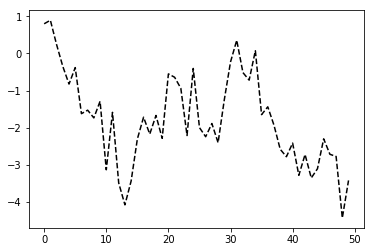

In [8]:
from numpy.random import randn
plt.plot(randn(50).cumsum(),'k--')

In [9]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
_ = ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000112339B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011344E10>]], dtype=object)

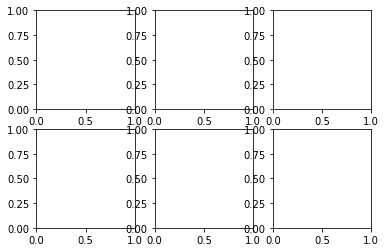

In [10]:
fig,axes = plt.subplots(2,3)
axes

In [11]:
"""
参数组合
请注意，参数定义的顺序必须是：必选参数、默认参数、可变参数/命名关键字参数和关键字参数。
默认参数一定要用不可变对象，如果是可变对象，程序运行时会有逻辑错误！
*args是可变参数，args接收的是一个tuple；
**kw是关键字参数，kw接收的是一个dict
"""
def f1(a, b, c=0, *args, **kw):
	print('a =', a, 'b =', b, 'c =', c, 'args =', args, 'kw =', kw)

def f2(a, b, c=0, *, d, **kw):
	print('a =', a, 'b =', b, 'c =', c, 'd =', d, 'kw =', kw)

f1(1, 2, 3, 'a', 'b', x=99)
f2(1, 2, d=99, ext=None,ext2='cc')

args = (1, 2, 3, 4)
kw = {'d': 99, 'x': '#'}
f1(*args, **kw)
args = (1, 2, 3)
f2(*args, **kw)

a = 1 b = 2 c = 3 args = ('a', 'b') kw = {'x': 99}
a = 1 b = 2 c = 0 d = 99 kw = {'ext': None, 'ext2': 'cc'}
a = 1 b = 2 c = 3 args = (4,) kw = {'d': 99, 'x': '#'}
a = 1 b = 2 c = 3 d = 99 kw = {'x': '#'}


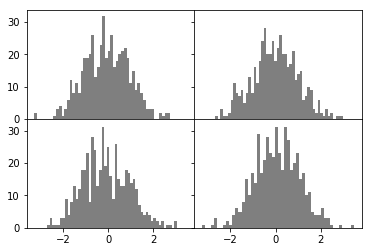

In [30]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

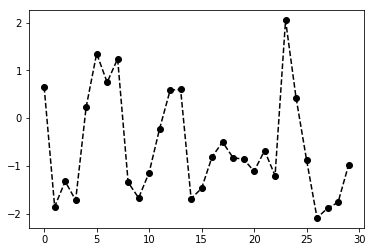

In [31]:
data = randn(30).cumsum()
plt.plot(data,'ko--',label='Default')

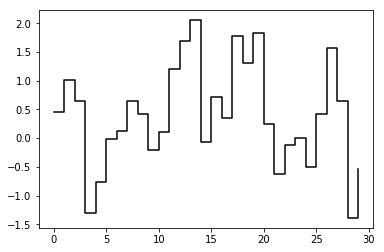

In [18]:
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')

No handles with labels found to put in legend.


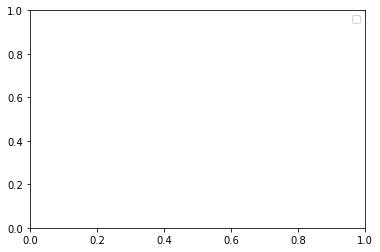

In [32]:
plt.legend(loc='best')

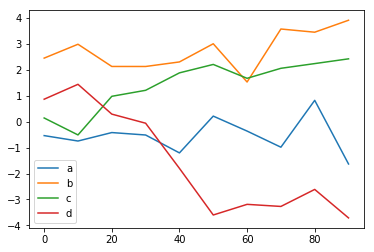

In [33]:
df = DataFrame(np.random.randn(10,4).cumsum(0),columns=['a','b','c','d'],index=np.arange(0,100,10))
df.plot()

In [21]:
df

,a,b,c,d
0,-0.528096,0.846875,-0.670907,-0.845627
10,-0.233064,0.422093,-3.126610,0.113363
20,1.788944,0.296548,-3.906966,-0.069042
30,1.019720,-1.515048,-3.577439,1.124991
40,2.691086,-0.984883,-1.476501,1.292747
50,2.626595,0.260440,-2.257346,3.434649
60,3.769709,2.624703,-2.043710,4.718494
70,4.432253,3.426411,-1.332262,3.995436
80,1.728453,2.449535,-1.687523,3.440593
90,1.945011,0.762788,-1.373524,4.381653


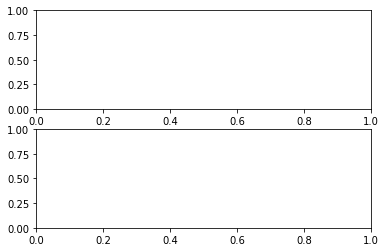

In [22]:
fig,axes=plt.subplots(2,1)
data = Series(np.random.rand(16),index=list('abcdefghijklmnop'))

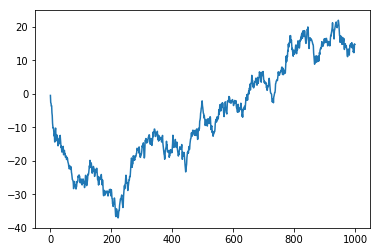

In [34]:
fig = plt.figure();ax=fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

In [39]:
ticks = ax.set_xticks([0,250,500,750,1000])

In [40]:
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')


In [41]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

In [23]:
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)

In [24]:
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

In [25]:
df = DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.912724,0.245424,0.640899,0.573137
two,0.299763,0.120956,0.907281,0.478998
three,0.178178,0.899920,0.625956,0.220684
four,0.925201,0.996535,0.877912,0.383545
five,0.736115,0.745550,0.485780,0.482655
six,0.428511,0.451661,0.153980,0.450956


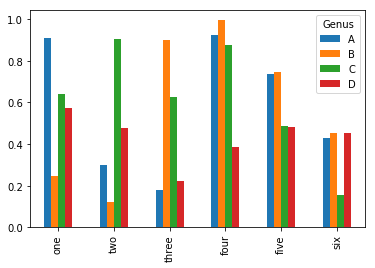

In [26]:
df.plot(kind='bar')

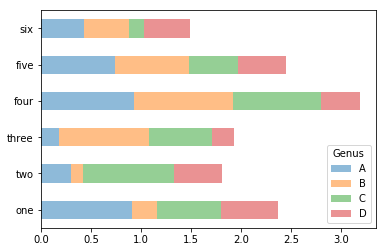

In [28]:
df.plot(kind='barh',stacked=True,alpha=0.5)

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

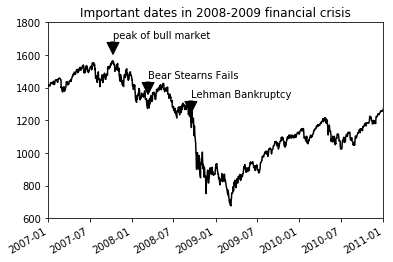

In [47]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('ch08/spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax,style='k-')

crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+50),
                xytext=(date,spx.asof(date)+200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left',verticalalignment='top')
            
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

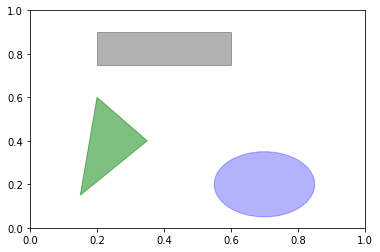

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [52]:
plt.savefig('test.png',dpi=400,bbox_inches='tight')

AttributeError: 'Circle' object has no attribute 'savefig'

In [53]:
tips = pd.read_csv('ch08/tips.csv')
party_counts = pd.crosstab(tips.day,tips.size)
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


In [54]:
party_counts = party_counts.ix[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis=0)
party_pcts

d:\www\learn-python\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


col_0
day
Fri
Sat
Sun
Thur


In [55]:
party_pcts.plot(kind='bar',stacked=True)

TypeError: Empty 'DataFrame': no numeric data to plot